In [21]:
# import libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("sentiment_analysis.csv")

In [23]:
df.head(10)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
5,2016,11,22,night,"Its night 2 am, feeling neutral",neutral,Facebook
6,2017,12,28,morning,2 am feedings for the baby are fun when he is ...,positive,Facebook
7,2017,12,28,noon,Soooo high,neutral,Instagram
8,2019,10,28,night,Both of you,neutral,Twitter
9,2018,5,28,morning,Today first time I arrive in the boat. Its ama...,positive,Facebook


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [25]:
df.shape

(499, 7)

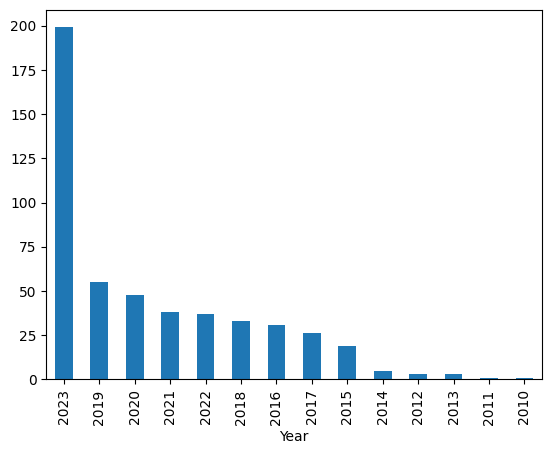

In [26]:
df.Year.value_counts().plot(kind='bar')
plt.show()

In [27]:
df.sentiment.value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

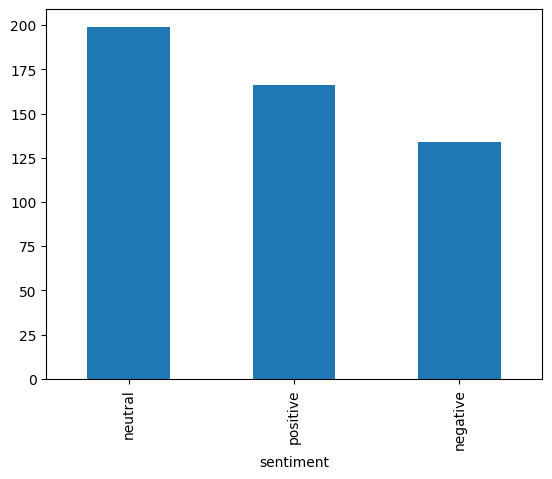

In [28]:
df.sentiment.value_counts().plot(kind='bar')
plt.show()

In [29]:
def mapping(x):
    map = {
        'neutral':0,
        'positive':1,
        'negative':2
    }
    return map.get(x)

In [30]:
df['sentiment'] = df['sentiment'].apply(mapping)

In [31]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,1,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",1,Facebook
2,2017,8,18,night,Don't angry me,2,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,2,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",2,Instagram


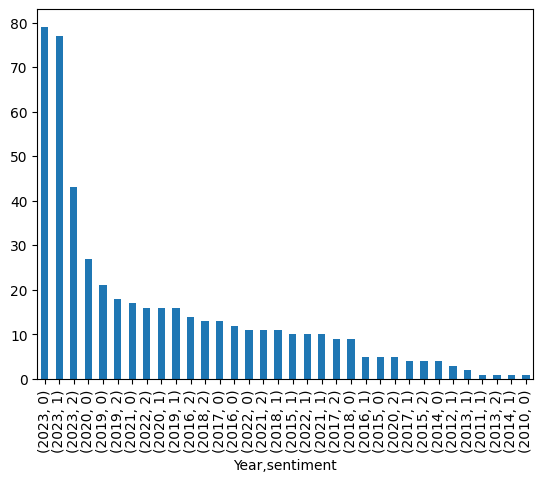

In [32]:
df.groupby('Year').sentiment.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

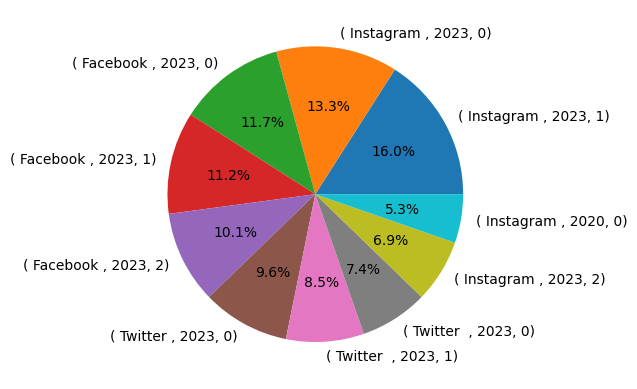

In [33]:
df.groupby(['Platform','Year']).sentiment.value_counts().sort_values(ascending = False).head(10).plot(kind = 'pie',autopct = '%1.1f%%',ylabel='')
plt.show()

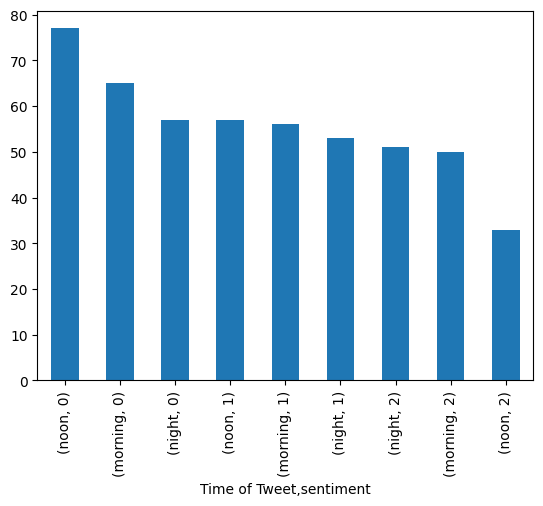

In [34]:
df.groupby('Time of Tweet').sentiment.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [35]:
total_word_count = 0
for content in df['text']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

5732


In [36]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
ps = PorterStemmer()

In [38]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [40]:
import nltk
nltk.download('stopwords')

df['text'] = df['text'].apply(stemming)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [41]:
total_word_count = 0
for content in df['text']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

3064


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.svm import SVC

In [43]:
X = df['text']
Y = df['sentiment']

In [44]:
X_train , X_test , Y_train , Y_test  = train_test_split(X, Y, test_size = 0.2 , stratify = Y , random_state = 42)

In [45]:
# Vectorization 
vc = TfidfVectorizer()
X_train = vc.fit_transform(X_train)
X_test = vc.transform(X_test)

In [46]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [47]:
# Make predictions
Y_pred_cls = model.predict(X_test)

accuracy_cls = accuracy_score(Y_test, Y_pred_cls)

f1_cls = f1_score(Y_test, Y_pred_cls, average='weighted')

report_cls = classification_report(Y_test, Y_pred_cls)
    
# Print the results for classification
print(f"Model: SVM")
print(f"Accuracy: {accuracy_cls:.4f}")
print(f"F1-Score: {f1_cls:.4f}")
print(f"Classification Report:\n{report_cls}")
print("="*50)

Model: SVM
Accuracy: 0.7300
F1-Score: 0.7247
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        40
           1       0.76      0.76      0.76        33
           2       0.88      0.52      0.65        27

    accuracy                           0.73       100
   macro avg       0.77      0.71      0.72       100
weighted avg       0.75      0.73      0.72       100



In [48]:
def val_to_category(val):
    category_map = {
       0:'neutral',
        1:'positive',
        2:'negative'
     }
    return category_map.get(val,-1)

In [49]:
def make_predictions(text):
    text = stemming(text)
    text = vc.transform([text])
    val = model.predict(text)
    val = val_to_category(int(val[0]))
    print("sentiment is : ",val)

In [ ]:
#Test the model with sample texts

In [50]:
make_predictions('i am really angry')

sentiment is :  negative


In [51]:
make_predictions('i want to drink water')

sentiment is :  neutral


In [52]:
make_predictions('i am really happy ')

sentiment is :  positive


In [53]:
make_predictions('The product is okay, but I"ve seen better')

sentiment is :  neutral


In [54]:
make_predictions('I hate the service; it"s terrible and disappointing.')

sentiment is :  negative


In [60]:
make_predictions('I love it ! It works wonders and exceeded my expectations!')

sentiment is :  positive
